<a href="https://colab.research.google.com/github/abel-keya/moringa-school-projects/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_Abel_Keya_Cluster_Sampling_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries we will need 

# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans


In [0]:
#https://data.illinois.gov/dataset
#DESCRIPTION
#State Employee Pay
#SUMMARY
#This dataset is a listing of all current state employees excluding sworn law enforcement officers. Current employees are defined as employees paid in the last 30 days. The following fields are included in the dataset: Agency, Agency Division, Employee Name, Position Title, Period Pay Rate, and YTD Gross Pay. This list is updated on a weekly basis.

#Source: https://data.illinois.gov/dataset/724state_employee_pay
#Last updated at https://data.illinois.gov/dataset : 2019-12-08
urlx= "https://query.data.world/s/cvmgaeaxx2ju2hjoloqv3jhvfyhoz5"
datax=pd.read_csv(urlx)
datax

,_id,Id,Agency,Agency Division,Employee Name,Position Title,Period Pay Rate,YTD Gross
0,1,43878FC35A4C8BFC203CE98D9EDFECB4A5A9CAD0,ABE LINCOLN PRES LIBRARY MUS2,ALPLM CONTRACTUAL EMPLOYEES,CHRISTIAN MCWHIRTER,CONTRACTUAL WORKER,3600,7200
1,2,8CF0D9F8C7705F4807210ABDF61E6C050F1108FC,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,CORY BLISSETT,CONTRACTUAL WORKER,400,6000
2,3,CB1307161CFD19077025E2577183F94C073A1AC4,ABE LINCOLN PRES LIBRARY MUS3,ALPLM CONTRACTUAL EMPLOYEES,TEST 3,CONTRACTUAL WORKER,8600,8200
3,4,844A6E6B935EE4ABE2DF5CD0419C50370171E2A1,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,GAYLE NEWENHAM,CONTRACTUAL WORKER,2200,38100
4,5,97A3363E9A6D7719EAAEF279CA31E785B5ECB07A,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,JACOB DETERS,CONTRACTUAL WORKER,300,9300
...,...,...,...,...,...,...,...,...
113613,113614,AE33E10D636D349DF15242DC780E3216A9CEC1E5,HUMAN SERVICES,CONTRACTUAL SERVICES,CHRISTINE GOOD-DEAL,CONTRACTUAL WORKER,500,95000
113614,113615,D53D24E79F9AA54B3D3F95667B8967DEF117307A,HUMAN SERVICES,CONTRACTUAL SERVICES,JILL BRUINGTON,CONTRACTUAL WORKER,100,73400
113615,113616,192C708912116BD8E1C02FF689033E93F391C764,HUMAN SERVICES,CONTRACTUAL SERVICES,MARGARET BRADSHAW,CONTRACTUAL WORKER,100,900
113616,113617,DEF6BDB21A10C0A7C2F406F91EEAD6C892DB8842,HUMAN SERVICES,CONTRACTUAL SERVICES,MARK HAYWARD,CONTRACTUAL WORKER,1400,62300


In [0]:
# Getting to know more about the dataset by accessing its information
# 
datax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113618 entries, 0 to 113617
Data columns (total 8 columns):
_id                113618 non-null int64
Id                 113618 non-null object
Agency             113618 non-null object
Agency Division    112706 non-null object
Employee Name      113618 non-null object
Position Title     113533 non-null object
Period Pay Rate    113618 non-null int64
YTD Gross          113618 non-null int64
dtypes: int64(3), object(5)
memory usage: 6.9+ MB


Cleaning our Dataset

In [0]:
datax.head()

,_id,Id,Agency,Agency Division,Employee Name,Position Title,Period Pay Rate,YTD Gross
0,1,43878FC35A4C8BFC203CE98D9EDFECB4A5A9CAD0,ABE LINCOLN PRES LIBRARY MUS2,ALPLM CONTRACTUAL EMPLOYEES,CHRISTIAN MCWHIRTER,CONTRACTUAL WORKER,3600,7200
1,2,8CF0D9F8C7705F4807210ABDF61E6C050F1108FC,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,CORY BLISSETT,CONTRACTUAL WORKER,400,6000
2,3,CB1307161CFD19077025E2577183F94C073A1AC4,ABE LINCOLN PRES LIBRARY MUS3,ALPLM CONTRACTUAL EMPLOYEES,TEST 3,CONTRACTUAL WORKER,8600,8200
3,4,844A6E6B935EE4ABE2DF5CD0419C50370171E2A1,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,GAYLE NEWENHAM,CONTRACTUAL WORKER,2200,38100
4,5,97A3363E9A6D7719EAAEF279CA31E785B5ECB07A,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,JACOB DETERS,CONTRACTUAL WORKER,300,9300


Accuracy 

In [0]:
# Checking if there is any missing value across each column
datax.isnull().any()

_id                False
Id                 False
Agency             False
Agency Division     True
Employee Name      False
Position Title      True
Period Pay Rate    False
YTD Gross          False
dtype: bool

In [0]:
# Checking how many missing values there are across each column
# 
datax.isnull().sum()

_id                  0
Id                   0
Agency               0
Agency Division    912
Employee Name        0
Position Title      85
Period Pay Rate      0
YTD Gross            0
dtype: int64

In [0]:
# Or we can do a quick check to see if we have any missing values at all
# 
print(datax.isnull().values.any())

True


In [0]:
# We might also want to get a total count of missing values
print(datax.isnull().sum().sum())

997


Consitency

In [0]:
#Duplicates are data points that are repeated in your dataset. 
# These should be simply removed.
datax.duplicated()
df1=datax.duplicated()
df1



0         False
1         False
2         False
3         False
4         False
          ...  
113613    False
113614    False
113615    False
113616    False
113617    False
Length: 113618, dtype: bool

In [0]:
df1.sum()

0

Uniformity

In [64]:
#Removing space between column names
datax.columns = datax.columns.str.replace(' ', '')
datax

,_id,Id,Agency,AgencyDivision,EmployeeName,PositionTitle,PeriodPayRate,YTDGross
0,1,29972,1,ALPLM CONTRACTUAL EMPLOYEES,CHRISTIAN MCWHIRTER,CONTRACTUAL WORKER,3600,7200
1,2,62379,0,ALPLM CONTRACTUAL EMPLOYEES,CORY BLISSETT,CONTRACTUAL WORKER,400,6000
2,3,90108,2,ALPLM CONTRACTUAL EMPLOYEES,TEST 3,CONTRACTUAL WORKER,8600,8200
3,4,58565,0,ALPLM CONTRACTUAL EMPLOYEES,GAYLE NEWENHAM,CONTRACTUAL WORKER,2200,38100
4,5,67109,0,ALPLM CONTRACTUAL EMPLOYEES,JACOB DETERS,CONTRACTUAL WORKER,300,9300
...,...,...,...,...,...,...,...,...
113613,113614,77066,31,CONTRACTUAL SERVICES,CHRISTINE GOOD-DEAL,CONTRACTUAL WORKER,500,95000
113614,113615,94640,31,CONTRACTUAL SERVICES,JILL BRUINGTON,CONTRACTUAL WORKER,100,73400
113615,113616,11114,31,CONTRACTUAL SERVICES,MARGARET BRADSHAW,CONTRACTUAL WORKER,100,900
113616,113617,99032,31,CONTRACTUAL SERVICES,MARK HAYWARD,CONTRACTUAL WORKER,1400,62300


In [0]:
datax['Agency'].unique

<bound method Series.unique of 0          ABE LINCOLN PRES LIBRARY MUS2
1         ABE LINCOLN PRES LIBRARY & MUS
2          ABE LINCOLN PRES LIBRARY MUS3
3         ABE LINCOLN PRES LIBRARY & MUS
4         ABE LINCOLN PRES LIBRARY & MUS
                       ...              
113613                    HUMAN SERVICES
113614                    HUMAN SERVICES
113615                    HUMAN SERVICES
113616                    HUMAN SERVICES
113617                 NATURAL RESOURCES
Name: Agency, Length: 113618, dtype: object>

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
datax['Id'] = lb_make.fit_transform(datax['Id'])
datax['Agency'] = lb_make.fit_transform(datax['Agency'])
#datax['AgencyDivision'] = lb_make.fit_transform(datax['AgencyDivision'])
#datax['EmployeeName'] = lb_make.fit_transform(datax['EmployeeName'])
#datax['PositionTitle'] = lb_make.fit_transform(datax['PositionTitle'])



**Plotting the Data**

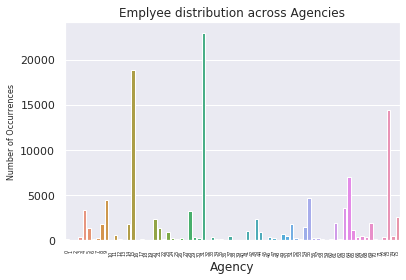

In [98]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
datax_count = datax['Agency'].value_counts()
sns.set(style="darkgrid")
sns.barplot(datax_count.index, datax_count.values, alpha=1.0)
plt.title('Emplyee distribution across Agencies',fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Agency', fontsize=12)
plt.figsize=(20,80)
plt.xticks(rotation=90,fontsize=5)
plt.show()


In [69]:
#Since we want to cluster our dataset depending on location, we are going to extract the Agency and Employee name and use them as our input while clustering
# To achieve this we will use panda's method .iloc to slice the columns we want from the dataset.
# The first argument of this method identifies the rows we want to keep
# The second - the columns
# In our case, we want to keep all rows and the 1 and 2 colummn.
# Note: Python column indices start from 0

x = datax.iloc[:, 2:3]

# Check if we got the 1 and 2 column
x

,Agency
0,1
1,0
2,2
3,0
4,0
...,...
113613,31
113614,31
113615,31
113616,31


**Clusteri**ng

In [105]:
# Create an object from the KMeans method we imported from sklearn library
# The argument in the Kmean method indicates the number of clusters we are aiming for. 
# We will use this object for clustering
kmeans = KMeans(10)

# calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
# Now that we have performed clustering, we need to obtain the predicted clusters for each observation by using the fit_predict method from sklearn.

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

# The result is an array containing the predicted clusters. There are 10 clusters .

array([8, 8, 8, ..., 2, 2, 9], dtype=int32)

In [111]:
# Create a copy of the data
data_with_clusters = datax.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters.count

<bound method DataFrame.count of            _id     Id  Agency  ... PeriodPayRate YTDGross Cluster
0            1  29972       1  ...          3600     7200       8
1            2  62379       0  ...           400     6000       8
2            3  90108       2  ...          8600     8200       8
3            4  58565       0  ...          2200    38100       8
4            5  67109       0  ...           300     9300       8
...        ...    ...     ...  ...           ...      ...     ...
113613  113614  77066      31  ...           500    95000       2
113614  113615  94640      31  ...           100    73400       2
113615  113616  11114      31  ...           100      900       2
113616  113617  99032      31  ...          1400    62300       2
113617  113618  72504      55  ...           100      100       9

[113618 rows x 9 columns]>

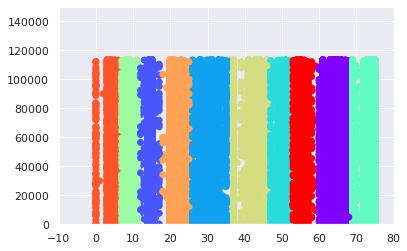

In [112]:
# Plot the data 
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Agency'],data_with_clusters['Id'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-10,80)
plt.ylim(0,150000)
plt.show()